In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plFuns import *
plt.rcParams['figure.figsize']=[32,18]

In [2]:
countries=['EN','ES']
seasons=pd.Series({_cntr:Season(_cntr) for _cntr in countries})

In [3]:
manu=seasons['EN'].Teams['Man United']
citeh=seasons['EN'].Teams['Man City']
itstotlads=seasons['EN'].Teams['Tottenham']
chelsea=seasons['EN'].Teams['Chelsea']
barca=seasons['ES'].Teams['Barcelona']
rm=seasons['ES'].Teams['Real Madrid']
pool=seasons['EN'].Teams['Liverpool']

In [4]:
seasons['EN'].all.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG
234,2018-01-20,Leicester,Watford,2.0,0.0
235,2018-01-20,Man City,Newcastle,3.0,1.0
236,2018-01-20,Stoke,Huddersfield,2.0,0.0
237,2018-01-20,West Ham,Bournemouth,1.0,1.0
238,2018-01-21,Southampton,Tottenham,1.0,1.0


In [5]:
for _season in seasons:
    print(_season.url)
    _season.calibrate()

http://www.football-data.co.uk/mmz4281/1718/E0.csv
http://www.football-data.co.uk/mmz4281/1718/SP1.csv


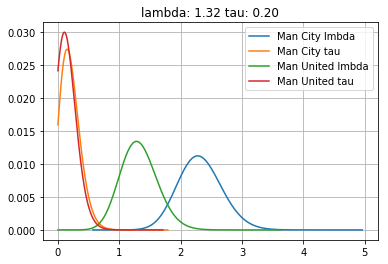

In [6]:
citeh.plt()
manu.plt()

In [7]:
for _season in seasons:
    _season.SimulateRestOfSeason(nScenarios=int(1e5))

In [8]:
seasons['EN'].get_all_results()

,Average Goals Against,Average Goals Scored,Average Points,CL,GA,GF,Points,Win,lambda,tau
Man City,30.29,111.43,99.40,100.000,18,70,65,99.861,2.318,0.225
Liverpool,41.30,91.19,81.39,95.649,28,54,47,0.039,1.739,0.307
Man United,30.05,76.48,80.91,94.086,16,49,53,0.088,1.323,0.196
Chelsea,29.07,70.07,77.35,79.777,16,45,50,0.012,1.171,0.167
Tottenham,37.58,74.01,71.64,24.747,22,47,45,0.000,1.290,0.261
Arsenal,47.87,72.06,67.91,5.725,31,45,42,0.000,1.241,0.504
Leicester,48.62,57.59,56.97,0.015,32,36,34,0.000,0.861,0.541
Burnley,33.13,33.17,55.03,0.001,21,19,34,0.000,0.281,0.161
Everton,62.58,41.20,42.55,0.000,39,26,28,0.000,0.389,0.956
Watford,69.91,52.67,42.00,0.000,44,33,26,0.000,0.773,1.103


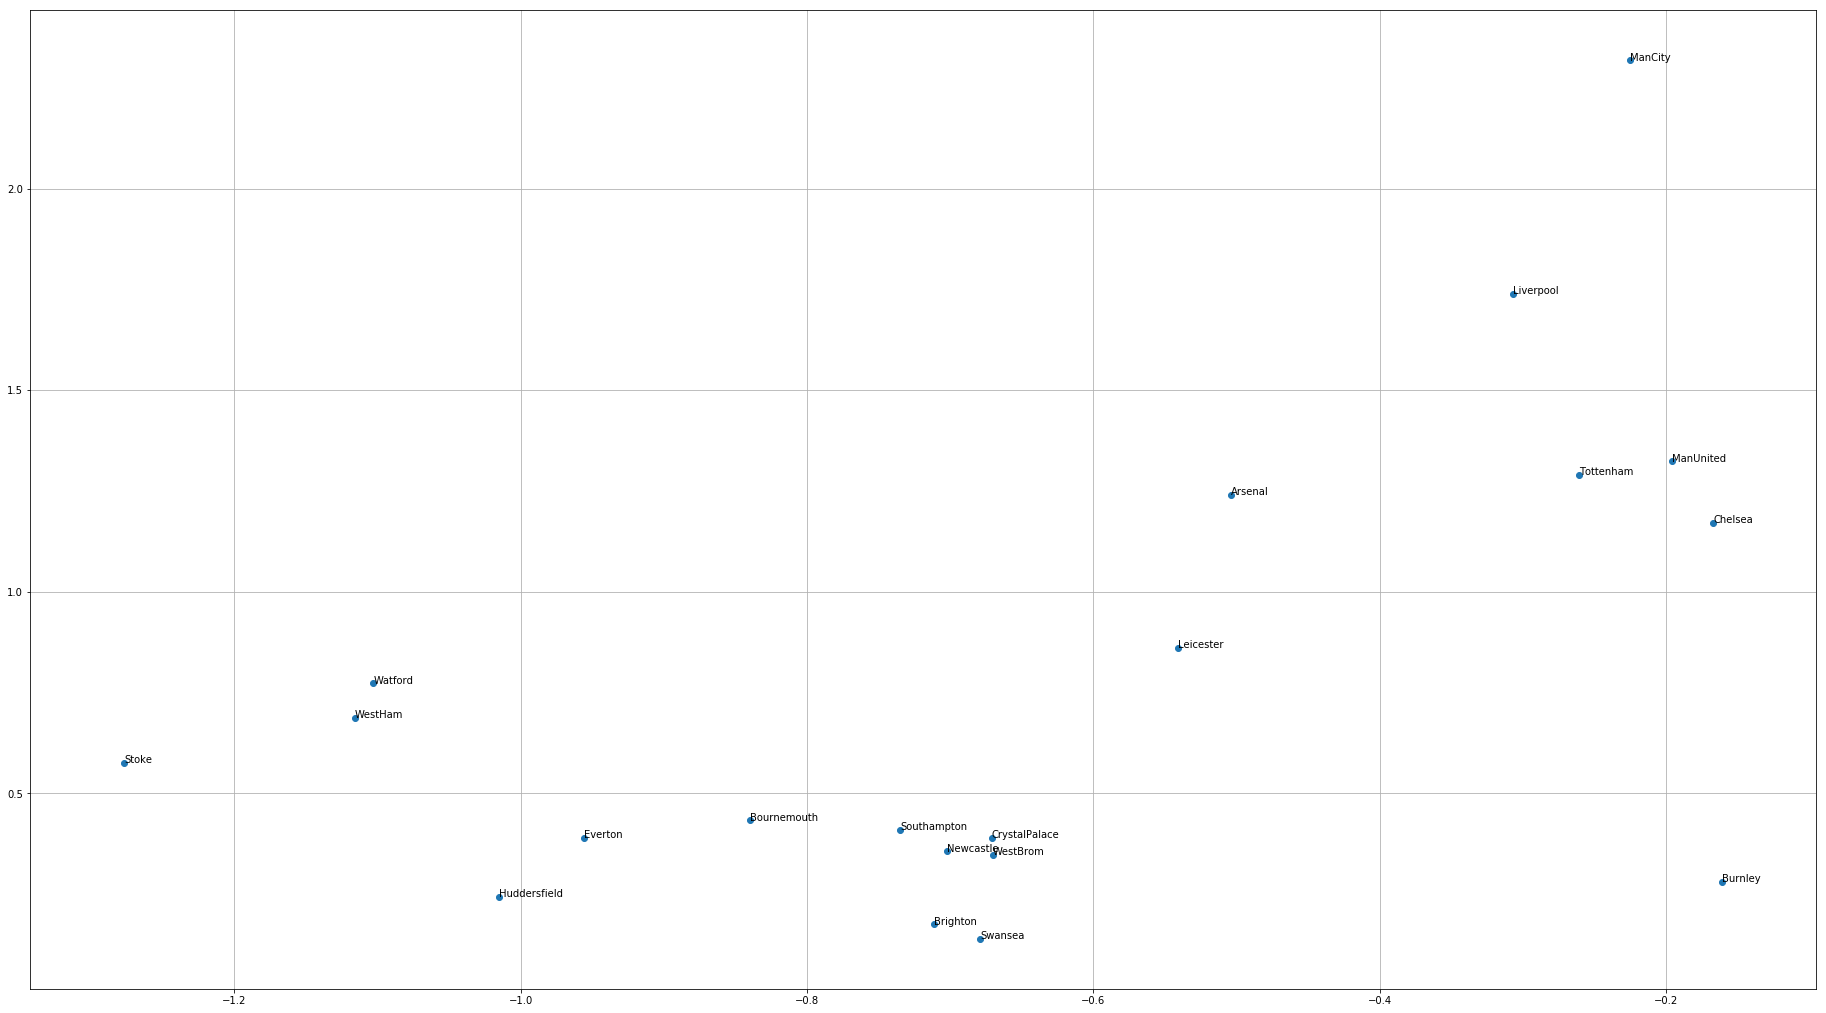

In [9]:
for ssn in ['EN']:
    results=seasons[ssn].get_all_results()
    x=-results['tau']
    y=results['lambda']
    nms=list(results.index)
    plt.scatter(x,y)
    for i, txt in enumerate(nms):
        plt.annotate(txt.replace(' ',''), (x[i],y[i]))    
plt.grid(True)
fig=plt.gcf()
fig.set_size_inches(32,18)
plt.savefig('ratings.pdf')

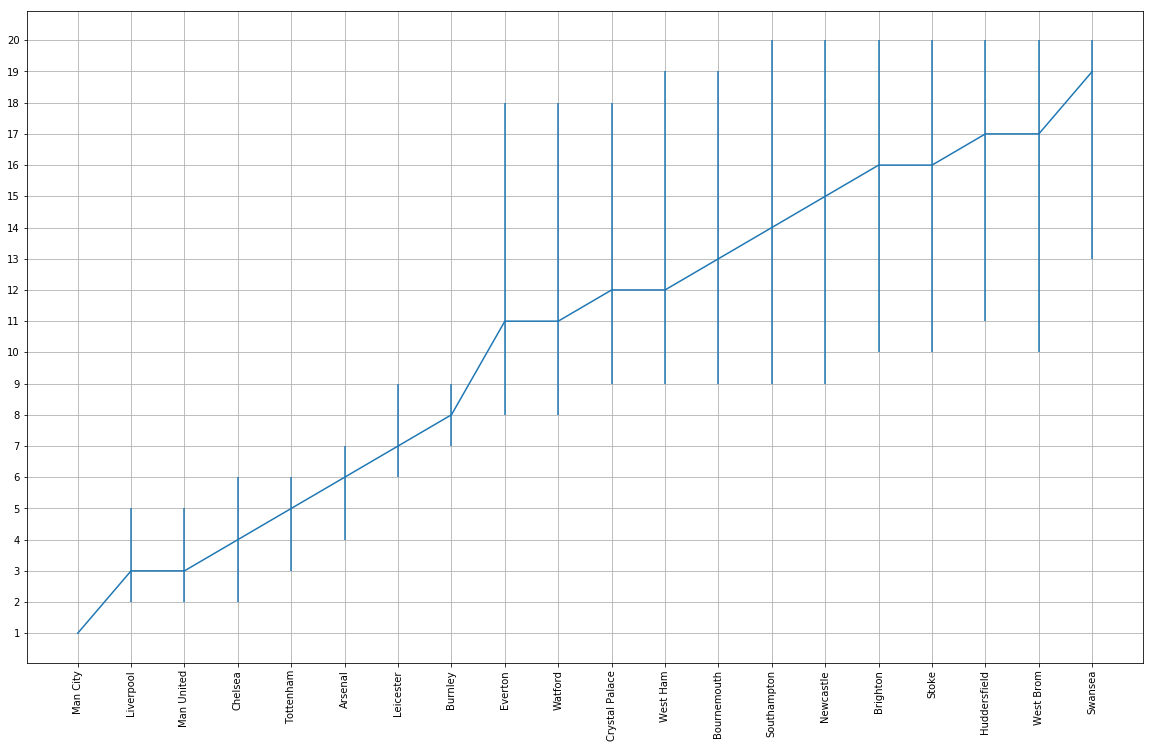

In [10]:
seasons['EN'].conf_int_plot(95,kind='')

In [11]:
manu + citeh

array([0.2327, 0.1831, 0.5842])

In [16]:
manu+pool 

array([0.3342, 0.2137, 0.4521])

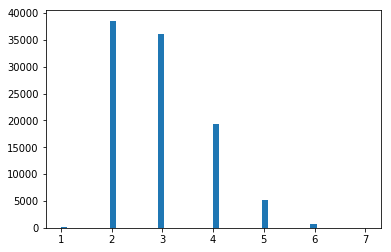

In [15]:
plt.hist(manu.place_scenarios,50);